In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import requests

%matplotlib inline

#### Define team_id dict

In [2]:
team_dict = {
    1: 'Arsenal',
    2: 'Bournemouth',
    3: 'Brighton',
    4: 'Burnley',
    5: 'Cardiff',
    6: 'Chealsea',
    7: 'Crystal Palace',
    8: 'Everton',
    9: 'Fulham',
    10: 'Huddersfield Town',
    11: 'Leicester City',
    12: 'Liverpool',
    13: 'Manchester City',
    14: 'Manchester United',
    15: 'Newcastle United',
    16: 'Southampton',
    17: 'Tottenham Hotspur',
    18: 'Watford',
    19: 'West Ham United',
    20: 'Wolverhampton',
    
}

#### Get Fixture Current Season

In [3]:
def get_fixture(week):
    url = 'https://fantasy.premierleague.com/drf/fixtures/?event={}'.format(week)
    r = requests.get(url)
    return [{'week': week, 'team_h': row['team_h'], 'team_a': row['team_a']} for row in r.json()]


def find_opponent_next_week(week, team_id):
    week += 1
    q = 'week == {} and (team_a == {} or team_h == {})'.format(week, team_id, team_id)
    fu = df_fixture.query(q)
    return fu[['team_a', 'team_h']][fu[['team_a', 'team_h']] != team_id].max(axis=1).values[0]
def is_home_next_week(week, team_id):
    week += 1
    q = 'week == {} and team_h == {}'.format(week, team_id)
    if (len(df_fixture.query(q)) > 0):
        return True
    return False


fixtures = []
for i in range(1, 39):
    fixtures += get_fixture(i)
    
df_fixture = pd.DataFrame(fixtures)


In [4]:
dfpr = pd.read_csv('./data/2018-19/players_raw.csv')
dfpr['team_name'] = dfpr.apply(lambda x: team_dict[x.team], axis=1)

In [5]:
cols = [
    'id',
    'first_name',
    'second_name',
    'team',
    'team_name'
]
df_players = dfpr[cols]

In [6]:
cols = [
    'id',
    'team',
    'team_code',
    'first_name',
    'second_name',
    'total_points',
    'code',
    'team_name',
]
dfpr[cols].sort_values('total_points', ascending=False)

,id,team,team_code,first_name,second_name,total_points,code,team_name
137,115,6,8,Marcos,Alonso,86,82263,Chealsea
144,122,6,8,Eden,Hazard,82,42786,Chealsea
351,280,13,43,Sergio,Agüero,80,37572,Manchester City
341,270,13,43,Raheem,Sterling,79,103955,Manchester City
320,253,12,14,Mohamed,Salah,75,118748,Liverpool
46,43,2,91,Callum,Wilson,72,75115,Bournemouth
314,247,12,14,Andrew,Robertson,71,122798,Liverpool
43,40,2,91,Ryan,Fraser,70,90105,Bournemouth
318,251,12,14,Sadio,Mané,68,110979,Liverpool
21,23,1,3,Pierre-Emerick,Aubameyang,67,54694,Arsenal


Text(0.5,1,'FPL Total Points Distribution')

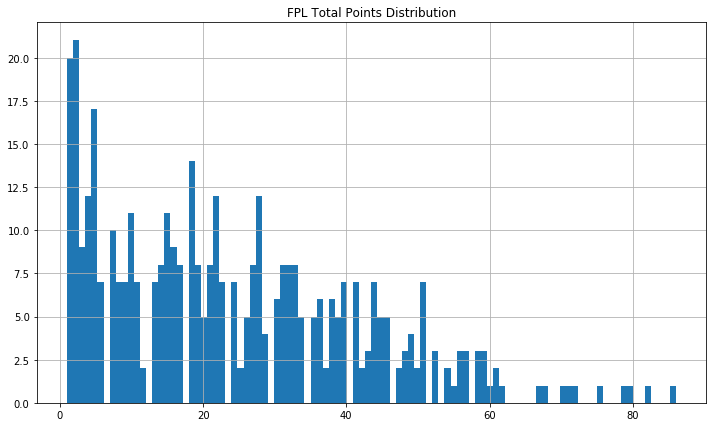

In [7]:
plt.figure(figsize=(12,7))
ax = dfpr.query('total_points > 0').total_points.hist(bins=100)
ax.set_title('FPL Total Points Distribution')

In [ ]:
#dfpr.query('team == 20')[cols]

## List top player points

In [8]:
cols = [
    'id',
    'first_name',
    'second_name',
    'total_points',
    'team',
    'now_cost',
    'team_name'
]
dfpr.sort_values(['total_points'], ascending=[False])[cols].head(20)

,id,first_name,second_name,total_points,team,now_cost,team_name
137,115,Marcos,Alonso,86,6,71,Chealsea
144,122,Eden,Hazard,82,6,113,Chealsea
351,280,Sergio,Agüero,80,13,114,Manchester City
341,270,Raheem,Sterling,79,13,112,Manchester City
320,253,Mohamed,Salah,75,12,130,Liverpool
46,43,Callum,Wilson,72,2,68,Bournemouth
314,247,Andrew,Robertson,71,12,65,Liverpool
43,40,Ryan,Fraser,70,2,62,Bournemouth
318,251,Sadio,Mané,68,12,99,Liverpool
21,23,Pierre-Emerick,Aubameyang,67,1,109,Arsenal


In [ ]:
dfpr.info()

In [ ]:
dfpr.groupby('team_name').sum()[['total_points', 'now_cost']].sort_values('now_cost')

In [ ]:
dfw = pd.read_csv('./data/2018-19/gws/gw1.csv', encoding="ISO-8859-1")

In [ ]:
dfw.info()

In [ ]:
dfpr.query('id == 14')[['first_name', 'second_name']]

In [ ]:
dfw.shape

In [ ]:
dfw = pd.merge(dfw, df_players, how='left', on='id')

In [ ]:
dfw['opponent_team_name'] = dfw.apply(lambda x: team_dict[x.opponent_team], axis=1)

In [ ]:
dfw.info()

In [ ]:
dfw[['name', 'id', 'team_name', 'opponent_team_name', 'total_points', 'goals_scored']].sort_values('total_points', ascending=False)

In [ ]:
dfw.info()

In [ ]:
dfw.groupby('team_name').sum()[['total_points', 'goals_scored']].sort_values('total_points', ascending=False)

In [ ]:
dfw['is_home'] = dfw['was_home'] == False

In [ ]:
dfw.groupby('team_name').head(1)[['team_a_score', 'team_h_score', 'team_name', 'opponent_team_name', 'was_home',]]

In [ ]:
df_players

# Find player last 3 games score

In [9]:
files = glob('./data/2018-19/players/*')

In [10]:
data = []
for f in files:
    player = f.split('/')[4]
    file = "{}/gw.csv".format(f)
    df = pd.read_csv(file)
    
    df_last3 = df.iloc[-3:]
    point = df['total_points'].sum()
    point_3_game = df_last3['total_points'].sum()
    point_median = df_last3['total_points'].median()
    point_mean = df_last3['total_points'].median()
    
    price = df.iloc[-1]['value'] / 10
    point_last_3_game_per_price = point_3_game / price
    price_per_point_last_3_game = price / point_3_game
    
    data_row = {
        'player': player, 
        'point_last_3_game': point_3_game, 
        'point_median': point_median, 
        'point_mean': point_mean, 
        'point_overall': point, 
        'price': price,
        #'point_last_3_game_per_price': point_last_3_game_per_price,
        'price_per_point_last_3_game': price_per_point_last_3_game,
    }
    
    data.append(data_row)
    
    #break

/home/tun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [11]:
df_form = pd.DataFrame(data)
df_form.sort_values(['point_last_3_game', 'price'], ascending=[False, False]).head(20)

,player,point_last_3_game,point_mean,point_median,point_overall,price,price_per_point_last_3_game
207,Raheem_Sterling_270,29,6.0,6.0,79,11.1,0.382759
505,Anthony_Martial_301,26,9.0,9.0,58,7.5,0.288462
530,Mohamed_Salah_253,25,8.0,8.0,75,13.0,0.520000
95,Marcos_Alonso_115,25,8.0,8.0,86,7.0,0.280000
116,Felipe Anderson_Pereira Gomes_465,25,9.0,9.0,52,6.9,0.276000
152,Richarlison_de Andrade_393,23,5.0,5.0,59,6.9,0.300000
293,Sergio_Agüero_280,22,7.0,7.0,80,11.4,0.518182
550,Callum_Wilson_43,22,7.0,7.0,72,6.8,0.309091
98,Callum_Paterson_101,21,7.0,7.0,39,5.2,0.247619
150,Sadio_Mané_251,20,3.0,3.0,68,9.9,0.495000


# Captian Classifier

#### Calculate Team score

In [12]:
def calculate_score_weight(row):
    weights = {
        'score_point': 0.3,
        'score_goal': 0.3,
        'score_completed_passes': 0.2,
        'score_dribbles': 0.1,
        'score_clean_sheets': 0.1,
    }
    score = 0
    for k,w in weights.items():
        value = row[k] * w
        value = w if value >= w else value
        score += value
            
    return score

def get_team_strength_df(df_awp, week_round):
    num_round = week_round
    agg = {
        'total_points': 'sum', 
        'team': 'first',
        #'id': 'count', 
        'goals_scored': 'sum', 
        'dribbles': 'sum',
        'creativity': 'sum',
        'completed_passes': 'sum',
        'clean_sheets': 'sum',
        'assists': 'sum',
        'big_chances_created': 'sum',
        'fouls': 'sum',
        'tackles': 'sum'
    }
    df_awp_round = df_awp.query('round <= {}'.format(num_round)).groupby('team_name').agg(agg).sort_values('total_points')
    df_awp_round['value'] = df_awp.query('round == {}'.format(num_round)).groupby('team_name').sum().sort_values('value')['value'] / 10
    df_awp_round['point'] = df_awp_round['total_points'] / num_round
    df_awp_round['score_point'] = df_awp_round['point'] / df_awp_round['point'].max()
    df_awp_round['score_goal'] = df_awp_round['goals_scored'] / df_awp_round['goals_scored'].max()
    df_awp_round['score_completed_passes'] = df_awp_round['completed_passes'] / df_awp_round['completed_passes'].max()
    df_awp_round['score_dribbles'] = df_awp_round['dribbles'] / df_awp_round['dribbles'].max()
    df_awp_round['score_clean_sheets'] = df_awp_round['clean_sheets'] / df_awp_round['clean_sheets'].max()
    
    df_awp_round['kscore'] = df_awp_round.apply(lambda r: calculate_score_weight(r), axis=1)
    
    return df_awp_round.sort_values('kscore', ascending=False)

CACHE_TEAM_STR = {}
def get_team_strength_score(df_awp, week_round, team_id):
    #print(type(week_round))
    if ((week_round == 0) or (team_id <= 0)):
        return None
    
    cache_key = '{}'.format(week_round)
    if cache_key not in CACHE_TEAM_STR.keys():
        df_score = get_team_strength_df(df_awp, week_round)
        CACHE_TEAM_STR[cache_key] = df_score
        
    df_score = CACHE_TEAM_STR[cache_key]
    #print(df_score)
    return df_score.query('team == {}'.format(team_id)).iloc[0].kscore

#get_team_strength_score(df_awp, 13, 20)
#get_team_strength_df(df_awp,11).sort_values('kscore', ascending=False)

In [13]:
files = glob('./data/2018-19/players/*')
df_awp = pd.DataFrame()
for f in files:
    player = f.split('/')[4]
    player_id = player.split('_')[2]
    file = "{}/gw.csv".format(f)
    df = pd.read_csv(file)
    
    df['total_points_preweek'] = df['total_points'].shift(1)
    df['total_points_preweek2'] = df['total_points'].shift(2)
    
    # Next week total point more than 4
    df['point_next_week'] = df['total_points'].shift(-1)
    df['y'] = df['total_points'].shift(-1) > 5
    df['opponent_team_next_week'] = df['opponent_team'].shift(-1)
    df['id'] = int(player_id)
    df_awp = df_awp.append(df)
    #df['opponent_team_name_next_week'] = df.apply(lambda x: team_dict[x.opponent_team_next_week], axis=1)

In [14]:
def get_player_team(player_id):
    player = dfpr.query('id == {}'.format(player_id))
    if len(player) == 0:
        return None
    return player.iloc[0].team

def get_player_name(player_id):
    player = dfpr.query('id == {}'.format(player_id))
    if len(player) == 0:
        return None
    return '{} {}'.format(player.iloc[0].first_name, player.iloc[0].second_name)

In [15]:
df_awp = df_awp[df_awp['total_points'] > 0]
df_awp.reset_index(inplace=True)

In [16]:
df_awp['team'] = df_awp.apply(lambda x: get_player_team(x.id), axis=1)
df_awp['team_name'] = df_awp.apply(lambda x: team_dict[x.team], axis=1)
df_awp['name'] = df_awp.apply(lambda x: get_player_name(x.id), axis=1)

In [17]:
df_awp['weekx'] = df_awp['round']

In [18]:
df_awp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 64 columns):
index                              3138 non-null int64
assists                            3138 non-null int64
attempted_passes                   3138 non-null int64
big_chances_created                3138 non-null int64
big_chances_missed                 3138 non-null int64
bonus                              3138 non-null int64
bps                                3138 non-null int64
clean_sheets                       3138 non-null int64
clearances_blocks_interceptions    3138 non-null int64
completed_passes                   3138 non-null int64
creativity                         3138 non-null float64
dribbles                           3138 non-null int64
ea_index                           3138 non-null int64
element                            3138 non-null int64
errors_leading_to_goal             3138 non-null int64
errors_leading_to_goal_attempt     3138 non-null int64
fixture    

In [19]:
df_awp['opponent_team_name'] = df_awp.apply(lambda x: team_dict[x.opponent_team], axis=1)
df_awp['opponent_strength'] = df_awp.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.opponent_team), axis=1)

In [20]:
df_awp['team_strength'] = df_awp.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.team), axis=1)

In [21]:
df_awp['opponent_team_next_week'] = df_awp.apply(lambda x: find_opponent_next_week(x.weekx, x.team), axis=1)
df_awp['opponent_strength_next_week'] = df_awp.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.opponent_team_next_week), axis=1)

In [22]:
df_awp['is_home_next_week'] = df_awp.apply(lambda x: is_home_next_week(x.weekx, x.team), axis=1)

In [23]:
df_awp[['opponent_team', 'opponent_team_name', 'opponent_strength', 'opponent_strength_next_week', 'is_home_next_week']].tail()

,opponent_team,opponent_team_name,opponent_strength,opponent_strength_next_week,is_home_next_week
3133,18,Watford,0.489298,0.418982,True
3134,16,Southampton,0.416084,0.443186,False
3135,9,Fulham,0.432268,0.578391,True
3136,14,Manchester United,0.558624,0.407084,False
3137,15,Newcastle United,0.417442,0.646036,True


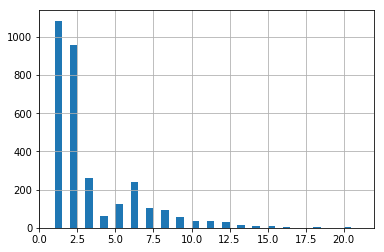

In [24]:
df_awp['total_points'].hist(bins=40)

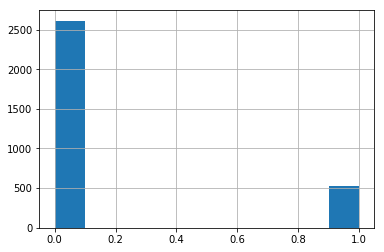

In [25]:
df_awp['y'].hist()

In [ ]:
#df_awp['opponent_team_next_week'] = df_awp['opponent_team_next_week'].fillna(value=0)

In [26]:
feature_cols = [
    'assists', 'attempted_passes', 'big_chances_created',
    'big_chances_missed', 'clean_sheets', 'completed_passes', 'creativity',
    'dribbles',
    'fouls',
    'goals_scored', 'influence', 'key_passes',
    'minutes', 'offside', 'open_play_crosses', 'opponent_team',
    'penalties_missed', 'penalties_saved',
    'red_cards', 'saves', 'tackled',
    'tackles', 'target_missed', 'total_points',
    'was_home', 'winning_goals', 'yellow_cards',
    'total_points_preweek', 'total_points_preweek2',
    'opponent_strength',
    'opponent_team_next_week', 'opponent_strength_next_week',
]

feature_cols = [
    'assists', 'minutes', 'dribbles',
    'goals_scored',
    'completed_passes',
    'total_points', 'total_points_preweek', 'total_points_preweek2',
    'was_home', 
    'team_strength',
    'opponent_strength',
    'opponent_strength_next_week',
    'value',
    'is_home_next_week',
    #'team', 'team_strength',
    #'opponent_team', 'opponent_strength',
    #'opponent_team_next_week', 'opponent_strength_next_week',
]

addtion_cols = [
    'id',
    'point_next_week',
    'round',
]

In [27]:
df_awp[feature_cols + ['y']].corr()[['y']].sort_values('y')

,y
opponent_strength_next_week,-0.127976
opponent_strength,-0.038977
was_home,0.004497
is_home_next_week,0.023058
dribbles,0.032560
assists,0.034497
goals_scored,0.057200
total_points_preweek2,0.073732
total_points_preweek,0.077951
completed_passes,0.100939


In [28]:
df_awp['total_points_preweek2'] = df_awp['total_points_preweek2'].fillna(df_awp['total_points_preweek2'].median())
df_awp['total_points_preweek'] = df_awp['total_points_preweek'].fillna(df_awp['total_points_preweek'].median())

In [29]:
df_awp[feature_cols].tail()

,assists,minutes,dribbles,goals_scored,completed_passes,total_points,total_points_preweek,total_points_preweek2,was_home,team_strength,opponent_strength,opponent_strength_next_week,value,is_home_next_week
3133,2,90,0,1,12,14,5.0,2.0,False,0.643592,0.489298,0.418982,63,True
3134,0,90,0,0,8,1,14.0,5.0,True,0.602629,0.416084,0.443186,64,False
3135,0,90,0,2,10,13,1.0,14.0,False,0.658308,0.432268,0.578391,65,True
3136,0,90,1,1,13,7,13.0,1.0,True,0.615178,0.558624,0.407084,66,False
3137,0,90,0,0,7,2,7.0,13.0,False,0.602058,0.417442,0.646036,68,True


In [30]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier ,ExtraTreesClassifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score

In [31]:
df_cleaned = df_awp[feature_cols + addtion_cols + ['y']].dropna()
                    
X = df_cleaned[feature_cols].values 
y = df_cleaned['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=124, stratify=y)

In [ ]:
sc = StandardScaler().fit(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [ ]:
df_train = df_awp.query('round < 10')[feature_cols + addtion_cols + ['y']].dropna()
X_train = df_train[feature_cols].values 
y_train = df_train['y'].values

df_test = df_awp.query('round >= 10')[feature_cols + addtion_cols + ['y']].dropna()
X_test = df_test[feature_cols].values 
y_test = df_test['y'].values

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
X.shape

In [32]:
models = [
    GradientBoostingClassifier(), 
    RandomForestClassifier(), 
    AdaBoostClassifier(), 
    BaggingClassifier(), 
    #VotingClassifier(estimator=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard'),
    ExtraTreesClassifier()
]

In [33]:
for model in models:
    print("\n\n\n" + model.__class__.__name__)
    model.fit(X_train, y_train)
    
    print('Train score: {}'.format(model.score(X_train, y_train)))
    print('Test score: {}'.format(model.score(X_test, y_test)))
    print('Preceision: {}'.format(precision_score(y_test, model.predict(X_test))))
    #print(classification_report(y_test, model.predict(X_test)))




GradientBoostingClassifier
Train score: 0.8623255813953489
Test score: 0.8312412831241283
Preceision: 0.6222222222222222



RandomForestClassifier
Train score: 0.9837209302325581
Test score: 0.8200836820083682
Preceision: 0.5272727272727272



AdaBoostClassifier
Train score: 0.8316279069767442
Test score: 0.803347280334728
Preceision: 0.41509433962264153



BaggingClassifier
Train score: 0.9827906976744186
Test score: 0.8158995815899581
Preceision: 0.5



ExtraTreesClassifier
Train score: 1.0
Test score: 0.8270571827057183
Preceision: 0.5740740740740741


In [34]:
model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
model = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

In [ ]:
#model = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')

In [ ]:
print(scores)
scores.mean()

In [ ]:
#model = SVC(probability=True).fit(X_train, y_train)

In [35]:
model.score(X_train, y_train)

0.8623255813953489

In [36]:
print(len(X_test))
model.score(X_test, y_test)

717


0.8312412831241283

In [37]:
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

      False       0.86      1.00      0.92      1755
       True       0.95      0.26      0.41       395

avg / total       0.88      0.86      0.83      2150



In [38]:
precision_score(y_test, model.predict(X_test))

0.6222222222222222

In [39]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

      False       0.85      0.97      0.90       585
       True       0.62      0.21      0.32       132

avg / total       0.80      0.83      0.80       717



In [ ]:
df_awp.dropna()[feature_cols + ['y']].dropna().shape

In [ ]:
#plt.hist(model.predict_proba(X_test)[:,1], bins=100)

In [ ]:
df_cleaned = df_awp.query('round == 11')[feature_cols  + addtion_cols+ ['y']].dropna()
                    
X = df_cleaned[feature_cols].values 
y = df_cleaned['y'].values
prediction = model.predict_proba(X)

In [ ]:
X.shape

In [ ]:
df_cleaned['predict'] = prediction[:,1]

In [ ]:
dfcm = pd.merge(df_cleaned.query('predict >= .50')[['id', 'predict', 'y', 'total_points', 'point_next_week', 'round']], df_players, on='id', how='left').sort_values('predict', ascending=False)
dfcm.sort_values(['predict', 'total_points'], ascending=False)

In [ ]:
precision_score(dfcm['y'], [True] * dfcm.shape[0])

### Predict lastest Week

In [40]:
files = glob('./data/2018-19/players/*')
df_awp_lastest = pd.DataFrame()
for f in files:
    player = f.split('/')[4]
    player_id = player.split('_')[2]
    file = "{}/gw.csv".format(f)
    df = pd.read_csv(file)
    
    df['total_points_preweek'] = df['total_points'].shift(1)
    df['total_points_preweek2'] = df['total_points'].shift(2)
    
    df['id'] = int(player_id)
    df_awp_lastest = df_awp_lastest.append(df.iloc[-1:])

In [ ]:
df_awp_lastest.shape

In [ ]:
#df_awp_lastest = df_awp_lastest[df_awp_lastest['total_points'] > 0]

In [ ]:
df_awp_lastest.shape

In [41]:
df_awp_lastest['weekx'] = df_awp_lastest['round']
df_awp_lastest['team'] = df_awp_lastest.apply(lambda x: get_player_team(x.id), axis=1)
df_awp_lastest['team_name'] = df_awp_lastest.apply(lambda x: team_dict[x.team], axis=1)
df_awp_lastest['name'] = df_awp_lastest.apply(lambda x: get_player_name(x.id), axis=1)
df_awp_lastest['opponent_strength'] = df_awp_lastest.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.opponent_team), axis=1)
df_awp_lastest['is_home_next_week'] = df_awp_lastest.apply(lambda x: is_home_next_week(x.weekx, x.team), axis=1)

In [42]:
df_awp_lastest['opponent_team_next_week'] = df_awp_lastest.apply(lambda x: find_opponent_next_week(x.weekx, x.team), axis=1)
df_awp_lastest['opponent_strength_next_week'] = df_awp_lastest.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.opponent_team_next_week), axis=1)

In [43]:
df_awp_lastest['team_strength'] = df_awp_lastest.apply(lambda x: get_team_strength_score(df_awp, x.weekx, x.team), axis=1)

In [44]:
df_awp_lastest

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,total_points_preweek2,weekx,team,team_name,name,opponent_strength,is_home_next_week,opponent_team_next_week,opponent_strength_next_week,team_strength
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,11,Leicester City,Filip Benkovic,0.408386,False,3.0,0.455651,0.558815
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,18,Watford,Stefano Okaka,0.420493,True,12.0,0.797830,0.528086
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,4,Burnley,Jonathan Walters,0.558815,True,15.0,0.417442,0.408386
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,3,Brighton,Davy Pröpper,0.375300,True,11.0,0.558815,0.455651
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,4,Burnley,Phil Bardsley,0.558815,True,15.0,0.417442,0.408386
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,12,Liverpool,Nathaniel Clyne,0.389181,False,18.0,0.528086,0.797830
1,0,86,0,0,3,40,1,9,74,1.5,...,NaN,12,17,Tottenham Hotspur,Juan Foyth,0.437530,True,6.0,0.866654,0.669202
11,0,0,0,0,0,0,0,0,0,0.0,...,0.0,12,4,Burnley,Matej Vydra,0.558815,True,15.0,0.417442,0.408386
11,0,0,0,0,0,0,0,0,0,0.0,...,2.0,12,11,Leicester City,James Maddison,0.408386,False,3.0,0.455651,0.558815
11,0,0,0,0,0,0,0,0,0,0.0,...,1.0,12,20,Wolverhampton,Bonatini Lohner Maia Bonatini,0.646036,True,10.0,0.346151,0.538668


In [45]:
df_cleaned = df_awp_lastest[feature_cols  + ['id', 'opponent_team_next_week', 'name']].dropna()
X = df_cleaned[feature_cols].values 
prediction = model.predict_proba(X)

In [46]:
df_cleaned['predict'] = prediction[:,1]

In [47]:
dfc = pd.merge(df_cleaned.query('predict >= 0.5')[['id', 'name', 'predict', 'total_points_preweek', 'team_strength', 'total_points_preweek2', 'total_points', 'opponent_team_next_week', 'opponent_strength_next_week', 'is_home_next_week']], df_players, on='id', how='left').sort_values('predict', ascending=False)
dfc['opponent_team_name_next_week'] = dfc.apply(lambda x: team_dict[x.opponent_team_next_week], axis=1)

dfc[['predict', 'total_points', 'name', 'team_name', 'team_strength', 'opponent_team_name_next_week', 'opponent_strength_next_week']]

,predict,total_points,name,team_name,team_strength,opponent_team_name_next_week,opponent_strength_next_week
13,0.954035,8,Mohamed Salah,Liverpool,0.797830,Watford,0.528086
2,0.836351,3,Sadio Mané,Liverpool,0.797830,Watford,0.528086
3,0.783643,6,Matthew Lowton,Burnley,0.408386,Newcastle United,0.417442
8,0.777440,10,Bernardo Mota Veiga de Carvalho e Silva,Manchester City,0.983386,West Ham United,0.470209
11,0.621014,2,Wesley Hoedt,Southampton,0.420493,Fulham,0.389181
0,0.620394,12,Andrew Robertson,Liverpool,0.797830,Watford,0.528086
6,0.594958,2,Raheem Sterling,Manchester City,0.983386,West Ham United,0.470209
7,0.578772,8,Xherdan Shaqiri,Liverpool,0.797830,Watford,0.528086
10,0.564895,2,Ederson Santana de Moraes,Manchester City,0.983386,West Ham United,0.470209
9,0.522008,4,Romelu Lukaku,Manchester United,0.542879,Crystal Palace,0.437530


In [48]:
get_team_strength_df(df_awp, 12)

,total_points,team,goals_scored,dribbles,creativity,completed_passes,clean_sheets,assists,big_chances_created,fouls,tackles,value,point,score_point,score_goal,score_completed_passes,score_dribbles,score_clean_sheets,kscore
team_name,,,,,,,,,,,,,,,,,,,
Manchester City,784,13,34,131,2931.3,7372,74,33,35,109,77,101.8,65.333333,1.000000,1.000000,0.954428,1.000000,0.9250,0.983386
Chealsea,696,6,26,106,2883.0,7724,72,26,29,105,66,92.1,58.000000,0.887755,0.764706,1.000000,0.809160,0.9000,0.866654
Liverpool,683,12,22,108,2061.6,6176,80,18,20,119,93,96.3,56.916667,0.871173,0.647059,0.799586,0.824427,1.0000,0.797830
Tottenham Hotspur,594,17,19,91,1749.0,5254,55,18,17,126,74,87.1,49.500000,0.757653,0.558824,0.680218,0.694656,0.6875,0.669202
Arsenal,536,1,24,80,1734.9,5430,22,24,16,127,77,88.2,44.666667,0.683673,0.705882,0.703004,0.610687,0.2750,0.646036
Bournemouth,540,2,21,72,1640.5,3772,46,18,31,110,53,70.1,45.000000,0.688776,0.617647,0.488348,0.549618,0.5750,0.602058
Everton,529,8,19,94,1812.2,3850,32,16,17,128,79,76.7,44.083333,0.674745,0.558824,0.498446,0.717557,0.4000,0.581516
Leicester City,507,11,15,94,1743.8,4227,41,16,20,110,86,68.7,42.250000,0.646684,0.441176,0.547255,0.717557,0.5125,0.558815
Manchester United,445,14,20,75,1681.0,4591,16,16,13,129,54,84.8,37.083333,0.567602,0.588235,0.594381,0.572519,0.2000,0.542879


# Deep Neural Network Classify > 5 points

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical, normalize
from keras.optimizers import SGD

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras_metrics

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
precision = keras_metrics.precision(label=1)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(sgd, loss='binary_crossentropy', metrics=[precision, 'acc'])

In [ ]:
sc = StandardScaler().fit(X)

In [ ]:
df_train = df_awp[feature_cols + addtion_cols + ['y']].dropna()
X = df_train[feature_cols].values 
y = df_train['y'].values

sc = StandardScaler().fit(X)

df_train = df_awp.query('round < 10 and total_points > 0')
X = df_train[feature_cols].values 
y = df_train['y'].values
X_train = sc.transform(X)
y_train = to_categorical(y)

df_train = df_awp.query('round >= 10 and total_points > 0')
X = df_train[feature_cols].values 
y = df_train['y'].values
X_test = sc.transform(X)
y_test = to_categorical(y)

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
train_split = 0.75
train_split_index = round(X.shape[0] * 0.75)

In [ ]:
sc = StandardScaler().fit(X)
X_scaled = sc.transform(X)
y_scaled = to_categorical(y)
"""
X_train = X_scaled[0:train_split_index]
X_test = X_scaled[train_split_index:]
y_train = y_scaled[0:train_split_index]
y_test = y_scaled[train_split_index:]
"""

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=124, stratify=y)

In [ ]:
#model.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test))
model.fit(X_train, y_train, batch_size=128, epochs=1000)

In [ ]:
plt.plot(model.history.history['loss'], label='loss')


In [ ]:
plt.plot(model.history.history['precision'])
#plt.plot(model.history.history['acc'])

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
precision_score(y_train.argmax(axis=1), model.predict(X_train).argmax(axis=1))

In [ ]:
precision_score(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))

In [ ]:
print(classification_report(y_train.argmax(axis=1), model.predict(X_train).argmax(axis=1)))

In [ ]:
print(classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

In [ ]:
predicted = model.predict_classes(X_train)

In [ ]:
y_test.argmax(axis=1)

In [ ]:
np.argmax(y_test, axis=0)

In [ ]:
y_test.argmax(axis=1)

In [ ]:
model.predict(X_test).argmax(axis=1)

In [ ]:
model.predict(X_test).argmax(axis=1)

In [ ]:
np.argmax(y_test, axis=1)

In [ ]:
for x in predicted:
    if x > 0:
        print (x)

# Grab Fixtures each week

In [ ]:
def get_fixture(week):
    url = 'https://fantasy.premierleague.com/drf/fixtures/?event={}'.format(week)
    r = requests.get(url)
    return [{'week': week, 'team_h': row['team_h'], 'team_a': row['team_a']} for row in r.json()]


def find_opponent_next_week(week, team_id):
    week += 1
    q = 'week == {} and (team_a == {} or team_h == {})'.format(week, team_id, team_id)
    fu = df_fixture.query(q)
    return fu[['team_a', 'team_h']][fu[['team_a', 'team_h']] != team_id].max(axis=1).values[0]
def is_home_next_week(week, team_id):
    week += 1
    q = 'week == {} and team_h == {}'.format(week, team_id)
    if (len(df_fixture.query(q)) > 0):
        return True
    return False


fixtures = []
for i in range(1, 39):
    fixtures += get_fixture(i)
    
df_fixture = pd.DataFrame(fixtures)


In [ ]:
get_fixture(38)

In [ ]:
df_fixture = pd.DataFrame(fixtures)

In [ ]:
df_fixture

In [ ]:
def find_opponent_next_week(week, team_id):
    week += 1
    q = 'week == {} and (team_a == {} or team_h == {})'.format(week, team_id, team_id)
    fu = df_fixture.query(q)
    return fu[['team_a', 'team_h']][fu[['team_a', 'team_h']] != team_id].max(axis=1).values[0]
def is_home_next_week(week, team_id):
    week += 1
    q = 'week == {} and team_h == {}'.format(week, team_id)
    if (len(df_fixture.query(q)) > 0):
        return True
    return False

In [ ]:
find_opponent_next_week(12, 14)

In [ ]:
is_home_next_week(12,7)

In [ ]:
df_fixture.query('week == 13')